# Cilj ove skripte 
Cilj ove skripte jeste početna analiza podataka. Nakon početne analize podataka smo radili na pospješivanju istih (crop slika na iste dimenzije- crop samo okolo lica). S obzirom da radimo sa malim setom podataka, koji se izuzetno razlikuju (slike iz različitih uglova, različitih perioda života iste osobe, itd.), posljednji dio notebooka služi automatskom dodavanju slika u bazu (ove slike se automatksi sa linka cropaju, imenuju i smještaju.)

In [1]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt


Odredite input folder koji-početni folder baze koji sadrži i train i val foldere.

In [2]:

root_input_folder = r"c:\Users\edina\Downloads\projekt13\projekt13\data"


## Funkcije za analizu sadržaja training i validation foldera. 
Prikazuju početno stanje baze.
Originalna baza je sadržala ukupno 5 osoba i to po sosbama broj slika(vise train nego val):
*mindy_kaling: 27 slika
jerry_seinfeld: 26 slika
madonna: 24 slika
elton_john: 22 slika
ben_afflek: 19 slika*

In [3]:
def count_images_by_person(root_folder):
    person_image_count = defaultdict(int)
    for dirpath, dirnames, filenames in os.walk(root_folder):
        if filenames:
            person = os.path.basename(dirpath)
            count = len([f for f in filenames if f.lower().endswith(".jpg")])
            if count > 0:
                person_image_count[person] += count
    return person_image_count


In [4]:
image_counts = count_images_by_person(root_input_folder)

print(f"Ukupno osoba: {len(image_counts)}")
print(f"Top 10 osoba po broju slika:")
for person, count in sorted(image_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{person}: {count} slika")


Ukupno osoba: 5
Top 10 osoba po broju slika:
mindy_kaling: 27 slika
jerry_seinfeld: 26 slika
madonna: 24 slika
elton_john: 22 slika
ben_afflek: 19 slika


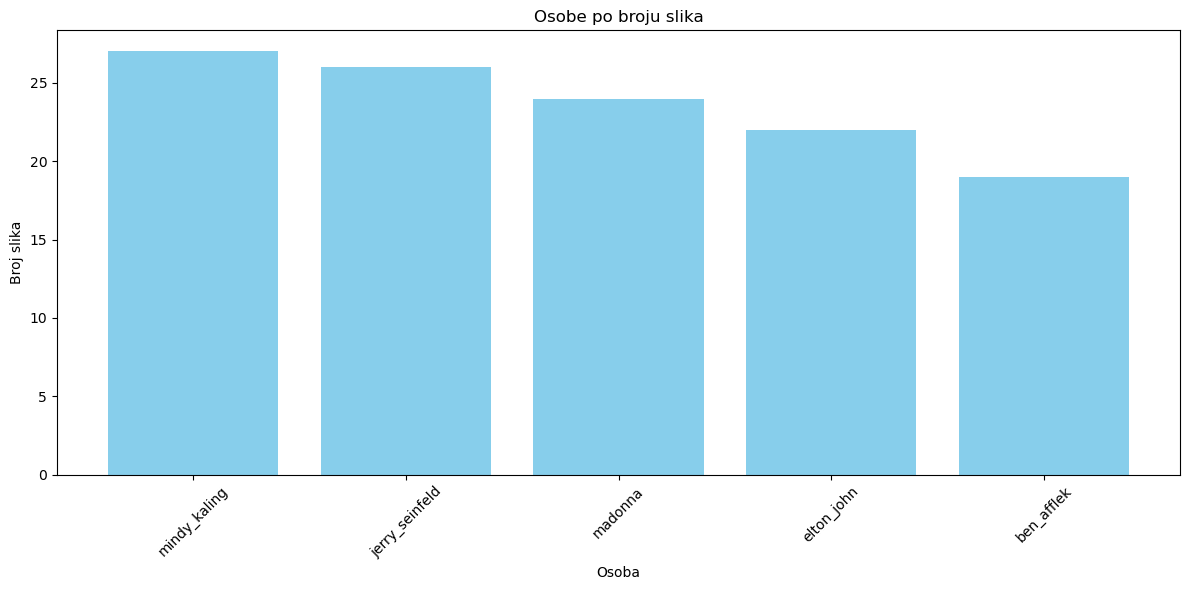

In [5]:
plt.figure(figsize=(12, 6))
top_people = sorted(image_counts.items(), key=lambda x: x[1], reverse=True)[:5]
names, counts = zip(*top_people)
plt.bar(names, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Osobe po broju slika")
plt.xlabel("Osoba")
plt.ylabel("Broj slika")
plt.tight_layout()
plt.show()


In [6]:
def analyze_folder_structure(root_folder):
    levels = defaultdict(int)
    for dirpath, dirnames, filenames in os.walk(root_folder):
        depth = dirpath.replace(root_folder, "").count(os.sep)
        levels[depth] += 1
    return levels


In [7]:
folder_levels = analyze_folder_structure(root_input_folder)
print("Broj foldera po dubini hijerarhije:")
for level, count in folder_levels.items():
    print(f"Level {level}: {count} foldera")


Broj foldera po dubini hijerarhije:
Level 0: 1 foldera
Level 1: 2 foldera
Level 2: 10 foldera


Mogući su problemi sa intstalacijom face_recognition koji je osnova cropanja početnih slika, s obzirom na to, postoji ovih par koraka koji će sigurno preskočiti bilo koji boundary

In [8]:
!pip install face_recognition


You should consider upgrading via the 'C:\Users\edina\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
!where python
!where pip


C:\Users\edina\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\edina\anaconda3\python.exe
C:\Users\edina\AppData\Local\Microsoft\WindowsApps\python.exe
C:\Users\edina\AppData\Local\Programs\Python\Python310\Scripts\pip.exe
C:\Users\edina\anaconda3\Scripts\pip.exe


In [10]:
import sys
print(sys.executable)

C:\Users\edina\anaconda3\python.exe


In [11]:
import sys
!{sys.executable} -m pip install face_recognition
print ("instaliran")

instaliran


In [12]:
import face_recognition
print("face_recognition ")


face_recognition 


## Dio skripte za prepoznavanje lica i croppanje
Ovaj dio koristi već gotovu biblioteku face_recognition, te croppa slike oko prepoznatog lica u dimenzijama 160x160. Iste dimenzije su mnogo bitne za treniranja modela koji radi sa bilo kakvim image detectionom

In [13]:
import shutil
from PIL import Image

In [14]:
root_output_folder = root_input_folder.rstrip("\\/") + "_changed"


In [15]:
def process_image(image_path, output_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)

    if not face_locations:
        print(f"No face found in {image_path}")
        return

    top, right, bottom, left = face_locations[0]
    face_image = image[top:bottom, left:right]

    pil_image = Image.fromarray(face_image).resize((160, 160))
    pil_image.save(output_path)
    print(f"Saved cropped face to: {output_path}")


### Funkcija za prolazak kroz sve slike dostupne u početnom folderu i croppanje istih

In [16]:
def walk_and_process(input_folder, output_folder):
    for dirpath, dirnames, filenames in os.walk(input_folder):
        relative_path = os.path.relpath(dirpath, input_folder)
        output_dir = os.path.join(output_folder, relative_path)
        os.makedirs(output_dir, exist_ok=True)

        for filename in filenames:
            if filename.lower().endswith(".jpg"):
                input_image_path = os.path.join(dirpath, filename)
                output_image_path = os.path.join(output_dir, filename)

                try:
                    process_image(input_image_path, output_image_path)
                except Exception as e:
                    print(f"Error processing {input_image_path}: {e}")

In [17]:
print(f"Processing folder: {root_input_folder}")
walk_and_process(root_input_folder, root_output_folder)


Processing folder: c:\Users\edina\Downloads\projekt13\projekt13\data
Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\ben_afflek\httpcsvkmeuaeccjpg.jpg
Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\ben_afflek\httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\ben_afflek\httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\ben_afflek\httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\ben_afflek\httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\ben_afflek\httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg


Dio za verifikaciju stanja nakon croppanja. Početna baza podataka je imala 118 slika ukupno prije obrade. Na 6 njih nije prepoznato lice. Stanje od 112 slika 5 različitih osoba je prilično loš ground za treniranje modela zasnovanog na image detectionu, bez obzira na 'kvalitetu' slika koje imamo. A pomenuto je već da je kvalitet prilično loš, pošto čak ni slike istih ljudi ne 'liče' dovoljno jedna drugoj. U nastavku je i kod za pronalaženje slika koje nisu croppane, kako bi iste mogli ručno urediti.

In [87]:
cropped_counts = count_images_by_person(root_output_folder)

In [20]:
print(f"Ukupno slika prije obrade: {sum(image_counts.values())}")
print(f"Ukupno slika poslije obrade: {sum(cropped_counts.values())}")

Ukupno slika prije obrade: 118
Ukupno slika poslije obrade: 112


In [21]:
def find_uncropped_images(input_folder, output_folder):
    missing_crop_images = []

    for dirpath, _, filenames in os.walk(input_folder):
        relative_path = os.path.relpath(dirpath, input_folder)
        output_dir = os.path.join(output_folder, relative_path)

        for filename in filenames:
            if filename.lower().endswith(".jpg"):
                input_image_path = os.path.join(dirpath, filename)
                output_image_path = os.path.join(output_dir, filename)

                if not os.path.exists(output_image_path):
                    missing_crop_images.append(input_image_path)

    return missing_crop_images


In [22]:
missing_images = find_uncropped_images(root_input_folder, root_output_folder)

if missing_images:
    print(f"Ukupno slika bez croppane verzije: {len(missing_images)}")
    print("Ove slike nisu imale croppanu verziju (pokušajte ih ručno croppati):")
    for img in missing_images:
        print(" -", img)
else:
    print("Sve originalne slike imaju croppanu verziju!")

Ukupno slika bez croppane verzije: 6
Ove slike nisu imale croppanu verziju (pokušajte ih ručno croppati):
 - c:\Users\edina\Downloads\projekt13\projekt13\data\train\ben_afflek\httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
 - c:\Users\edina\Downloads\projekt13\projekt13\data\train\elton_john\httpsdfrpwlycscloudfrontnetdeltonjohnjpg.jpg
 - c:\Users\edina\Downloads\projekt13\projekt13\data\train\elton_john\httpsticketmnettmenusdamabbacdaebeafdbbCUSTOMjpg.jpg
 - c:\Users\edina\Downloads\projekt13\projekt13\data\train\madonna\httpssmediacacheakpinimgcomxafafedebcbjpg.jpg
 - c:\Users\edina\Downloads\projekt13\projekt13\data\train\mindy_kaling\httpssmediacacheakpinimgcomxeedccadejpg.jpg
 - c:\Users\edina\Downloads\projekt13\projekt13\data\val\ben_afflek\httpcsvkmeuaafdfjpg.jpg


# Dodavanje slika u bazu *Depricated verzija*
### Molim predjite na dio 'Dodavanje slika u bazi - Current version'
Ovo je prvobitni način koji smo koristili za dodavanje stavki u bazu. Isti je bio definitivno brži no ručni download, ali opet izuzetno spor.

*Naredni dio koda služi pospješivanju baze i već je najavljen na početku. Odabirom foldera i unosom linkova na slike, slike dimenzija 250x250 okolo lica, ce se unositi u originalnu bazu. S toga napomena: *NAPRAVITI BACKUP ORIGINALNE BAZE PRIJE PUNJENJA NOVIM SLIKAMA* *

### Funkcija za prkaz postojećih kategorija

In [23]:

def list_subfolders(folder_path):
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    for i, folder in enumerate(subfolders, 1):
        print(f"{i}. {folder}")
    return subfolders


### Funkcija za unos izbora korisnika


In [30]:
def choose_folder(subfolders, level_name="folder"):
    while True:
        try:
            choice = int(input(f"Izaberite broj {level_name} kojeg želite koristiti (0 za prekid): "))
            if choice == 0:
                return None
            elif 1 <= choice <= len(subfolders):
                return subfolders[choice - 1]
            else:
                print(".")
        except ValueError:
            print(".")


### Funkcija za preuzimanje i obradu slike sa linka

In [25]:

from io import BytesIO
import uuid

def download_and_crop_image(url, output_folder):
    try:
        response = requests.get(url, timeout=5)
        image = face_recognition.load_image_file(BytesIO(response.content))
        face_locations = face_recognition.face_locations(image)

        if not face_locations:
            print(f"Nije prepoznato lice: {url}")
            return

        top, right, bottom, left = face_locations[0]
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image).resize((160, 160))

        filename = f"{uuid.uuid4().hex[:10]}.jpg"
        output_path = os.path.join(output_folder, filename)
        pil_image.save(output_path)
        print(f"Spašeno: {output_path}")
    except Exception as e:
        print(f"Greška")


Možemo koristiti uuid4 za generisanje unikatnih naziva slika

In [34]:
import requests
from io import BytesIO
import uuid

def input_loop_for_images(target_folder):
    print("Unosite linkove slika. Unesite 0 za kraj.")

    while True:
        url = input("URL slike: ").strip()
        if url == "0":
            print("Izlaze.")
            break

        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            image = Image.open(BytesIO(response.content)).convert("RGB")

            # Nasumično ime slike
            unique_name = f"{uuid.uuid4().hex}.jpg"
            temp_path = os.path.join(target_folder, "_temp_download.jpg")
            final_path = os.path.join(target_folder, unique_name)

            image.save(temp_path)

            process_image(temp_path, final_path)
            os.remove(temp_path)

        except requests.exceptions.RequestException as req_err:
            print(f"Greška pri skidanju slike: {req_err}")
        except Image.UnidentifiedImageError:
            print("Slika nije prepoznata. Možda nije validna.")
        except Exception as e:
            print(f"Neočekivana greška: {e}")


In [39]:
root_output_folder = r"c:\Users\edina\Downloads\projekt13\projekt13\data_changed"

# 1. Prvi nivo rain ili val
print("Glavni folderi :")
first_level_folders = ["train", "val"]  # Pošto znaš da ih ima samo 2, možeš direktno navesti
for i, folder in enumerate(first_level_folders, 1):
    print(f"{i}. {folder}")

try:
    top_choice = int(input("Izaberite broj glavnog foldera kojeg želite koristiti (0 za prekid): "))
    if top_choice == 0:
        print("izlaz")
    elif 1 <= top_choice <= len(first_level_folders):
        selected_top = first_level_folders[top_choice - 1]
        selected_top_path = os.path.join(root_output_folder, selected_top)

        print(f"\nFolderi unutar '{selected_top}':")
        second_level_folders = list_subfolders(selected_top_path)
        selected_person = choose_folder(second_level_folders, "osobe")

        if selected_person:
            target_folder = os.path.join(selected_top_path, selected_person)
            print(f"\nOdabrani folder za punjenje: {target_folder}")
            input_loop_for_images(target_folder)
        else:
            print("Izlaz.")
    else:
        print("Neispravan izbor.")
except ValueError:
    print("Unos nije broj.")

Glavni folderi :
1. train
2. val


Izaberite broj glavnog foldera kojeg želite koristiti (0 za prekid):  1



Folderi unutar 'train':
1. ben_afflek
2. elton_john
3. jerry_seinfeld
4. madonna
5. mindy_kaling


Izaberite broj osobe kojeg želite koristiti (0 za prekid):  2



Odabrani folder za punjenje: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\elton_john
Unosite linkove slika. Unesite 0 za kraj.


URL slike:  https://m.media-amazon.com/images/M/MV5BMjM3Njk3Nzc4MF5BMl5BanBnXkFtZTgwODMzNjUxMzE@._V1_.jpg


Saved cropped face to: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\train\elton_john\1d575e775c1f47aabda8336c11df6695.jpg


KeyboardInterrupt: Interrupted by user

# Dodavanje slika u bazu *Current version*
Ovo je finalni način koji smo koristili za dodavanje stavki u bazu.
Naredni dio koda služi pospješivanju baze i već je najavljen na početku. Odabirom foldera i unosom teksta pretraživanja u dato polje, slike dimenzija 250x250 okolo lica, koje su rezultat datog pretraživanja, ce se unositi u skoro-pa-originalnu bazu (dio sa _changed). S toga napomena: *NAPRAVITI BACKUP ORIGINALNE BAZE PRIJE PUNJENJA NOVIM SLIKAMA* *

### !pip install icrawler
icrawler je Python biblioteka namijenjena pretraživanju i preuzimanju slika iz različitih izvora kao što su Google, Bing i Flickr. Automatizuje proces prikupljanja skupova slika, čineći ga efikasnim za zadatke koji zahtijevaju velike kolekcije vizuelnih podataka.

In [43]:
!pip install icrawler


You should consider upgrading via the 'C:\Users\edina\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
import sys
!{sys.executable} -m pip install icrawler
print ("instaliran")

instaliran


In [ ]:
import os
import uuid
from PIL import Image
import face_recognition

In [54]:
from icrawler.builtin import GoogleImageCrawler

In [83]:
top_folders = [f for f in os.listdir(root_output_folder) if os.path.isdir(os.path.join(root_output_folder, f))]
print("Glavni folderi:")
for i, folder in enumerate(top_folders, 1):
    print(f"{i}. {folder}")
selected_top_idx = int(input("Izaberite broj glavnog foldera (0 za prekid): "))
if selected_top_idx == 0:
    raise SystemExit
selected_top = top_folders[selected_top_idx - 1]
selected_top_path = os.path.join(root_output_folder, selected_top)

second_folders = [f for f in os.listdir(selected_top_path) if os.path.isdir(os.path.join(selected_top_path, f))]
print(f"\nFolderi unutar '{selected_top}':")
for i, folder in enumerate(second_folders, 1):
    print(f"{i}. {folder}")
selected_person_idx = int(input("Izaberite broj osobe (0 za prekid): "))
if selected_person_idx == 0:
    raise SystemExit
selected_person = second_folders[selected_person_idx - 1]
target_folder = os.path.join(selected_top_path, selected_person)
print(f"\nOdabran folder: {target_folder}")

Glavni folderi:
1. train
2. val


Izaberite broj glavnog foldera (0 za prekid):  2



Folderi unutar 'val':
1. ben_afflek
2. elton_john
3. jerry_seinfeld
4. madonna
5. mindy_kaling


Izaberite broj osobe (0 za prekid):  5



Odabran folder: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling


### Unos pojma za pretragu i skidanje skika

Originalne slike pronadjene u pretrazi se spramaju u tempporary folder, tj kao remporary slojevi, kako bi se tek nakon potpune planirane obrade,- face recognition i crop, spremile u odgovarajući folder- koji je korisnik odabrao.

Za training folder smo skidali po dodatnih 20 slika, za validation folder po dodatnih 10 slika, ovaj broj se može mjenjati promjenom *max_num* varijable. 

Naravno-ne desi se uvijek da su sve slike iz crawlinga 'uspjele', neke mogu biti nevalidnog oblika, na nekim face recognition nece raditi, takodjer smo primjetili da se u pretrazivanju Elton Johna random pojavi jedna ženska slika, ali sve su to greške koje se mogu dopustiti na ovoliki obim podataka. Ovakav način bi nam dopustio da za vrlo kratko vrijeme bazu napunimo stotinama slika. Sve je nakon potrebno i QC-ati.

In [84]:
search_query = input("Unesite pojam za pretragu ('Madonna 2024 photo'): ").strip()
temp_folder = os.path.join(target_folder, "_temp_downloads")
os.makedirs(temp_folder, exist_ok=True)

print("Skidam slike")
crawler = GoogleImageCrawler(storage={'root_dir': temp_folder})
crawler.crawl(keyword=search_query, max_num=10)

Unesite pojam za pretragu ('Madonna 2024 photo'):  Mindy Kaling 2015


2025-06-10 22:58:46,186 - INFO - icrawler.crawler - start crawling...
2025-06-10 22:58:46,187 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-06-10 22:58:46,195 - INFO - feeder - thread feeder-001 exit
2025-06-10 22:58:46,198 - INFO - icrawler.crawler - starting 1 parser threads...
2025-06-10 22:58:46,202 - INFO - icrawler.crawler - starting 1 downloader threads...


Skidam slike


2025-06-10 22:58:47,093 - INFO - parser - parsing result page https://www.google.com/search?q=Mindy+Kaling+2015&ijn=0&start=0&tbs=&tbm=isch
2025-06-10 22:58:48,790 - INFO - downloader - image #1	https://imageio.forbes.com/specials-images/imageserve/b9e1c0540e794d07a7c2b5b288eeba2d/0x0.jpg
2025-06-10 22:58:49,262 - INFO - downloader - image #2	https://static01.nyt.com/images/2015/05/14/fashion/cannes-fashion-slide-6UB3/cannes-fashion-slide-6UB3-jumbo.jpg
2025-06-10 22:58:49,892 - INFO - downloader - image #3	https://www.hollywoodreporter.com/wp-content/uploads/2015/03/mindy_kaling_oscars_vanity_fair_h_2015.jpg
2025-06-10 22:58:50,131 - ERROR - downloader - Response status code 400, file https://media.gettyimages.com/id/473889388/photo/cannes-france-mindy-kaling-attends-the-inside-out-premiere-during-the-68th-annual-cannes-film.jpg
2025-06-10 22:58:51,180 - INFO - downloader - image #4	https://www.capecodtimes.com/gcdn/authoring/2015/09/25/NCCT/ghows-CC-206d2902-7a26-07b4-e053-0100007f89

Proces cropanja, imenovanja, itd. je vec prethodno objasnjen kroz kod, ovdje su samo minorne izmjene

In [85]:
print("Obrađujem slike...")
for fname in os.listdir(temp_folder):
    in_path = os.path.join(temp_folder, fname)
    if not fname.lower().endswith(".jpg"):
        continue
    out_name = f"{uuid.uuid4().hex[:10]}.jpg"
    out_path = os.path.join(target_folder, out_name)
    try:
        if process_image(in_path, out_path):
            print(f"Sačuvano: {out_path}")
        else:
            print(f"Bez lica: {in_path}")
    except Exception as e:
        print(f"Greška ")


Obrađujem slike...
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\4042230cad.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\2b86c05169.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\a108ddbbdb.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\2d37941ecb.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\0294806299.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\1d1315b042.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\b442d59327.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\bc8bc175a1.jpg
Sačuvano: c:\Users\edina\Downloads\projekt13\projekt13\data_changed\val\mindy_kaling\3784743d31.jpg


Brisanje iz temp foldera

In [86]:
shutil.rmtree(temp_folder)
print("Gotovo. Privremene slike obrisane.")

Gotovo. Privremene slike obrisane.


## Pretrage koristene za punjenje baze:
*TRAINING FOLDER* (oko 20)
- Ben Affleck 2021
- Elton John Now
- Jerry Seinfeld 2017
- Madonna Young
- Mindy Kaling 2012
  
*VALIDATION FOLDER* (oko 10)
- Ben Affleck 2019
- Elton John 2015
- Jerry Seinfeld 2024
- Madonna 2009
- Mindy Kaling 2015

In [88]:
cropped_counts = count_images_by_person(root_output_folder)

print(f"Ukupno slika prije obrade: {sum(image_counts.values())}")
print(f"Ukupno slika poslije obrade: {sum(cropped_counts.values())}")

Ukupno slika prije obrade: 118
Ukupno slika poslije obrade: 262


Prije obrade je bilo 118 slika, nakon dodavanja slika baza posjeduje 262 slike, što za trening, što validacijskih. Ovo bi trebalo uveliko pospješiti model.